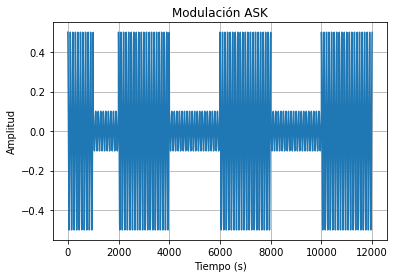

In [45]:
import numpy as np
import matplotlib.pyplot as plt

def generate_ask_signal(bits, carrier_freq, sampling_rate, bit_duration, amplitude):
    num_samples_per_bit = int(bit_duration * sampling_rate)
    t = np.linspace(0, bit_duration, num_samples_per_bit, endpoint=False)
    carrier_signal = np.sin(2 * np.pi * carrier_freq * t)
    
            
    # Señal modulada ASK
    modulated_signal = np.array([])
    for bit in bits:
        if bit == 0:
            modulated_signal = np.append(modulated_signal, amplitude[0] * np.cos(2 * np.pi * carrier_freq * t))
        else:
            modulated_signal = np.append(modulated_signal, amplitude[1] * np.cos(2 * np.pi * carrier_freq * t))
        
    
    return np.array(modulated_signal)

def demodulate_ask(signal, carrier_freq, sampling_rate, bit_duration, threshold):
    num_samples_per_bit = int(bit_duration * sampling_rate)
    omega_c = 2 * np.pi * carrier_freq
    num_samples = len(signal)
    phase = 0
    demodulated_bits = []
    
    for i in range(0, num_samples, num_samples_per_bit):
        symbol_samples = signal[i:i+num_samples_per_bit]

        symbol_energy = np.sum(np.abs(symbol_samples) ** 2) / num_samples_per_bit
        #
        if symbol_energy > threshold:
            demodulated_bits.append(1)
        else:
            demodulated_bits.append(0)
    
    return demodulated_bits

# Parámetros de la señal
carrier_freq  = 1000   # Frecuencia de la portadora en Hz
bit_duration  = 0.01   # Duración de un bit en segundos
sampling_rate = 100e3 # Tasa de muestreo en muestras por segundo
amplitude     = (0.1,0.5)       # Amplitud para bit 1

threshold     = 0.1       # Umbral de energía para demodulación

# Mensaje a modular (en binario)
message = '101100110011'

# Convertir el mensaje a una lista de bits
bits = [int(bit) for bit in message]

# Generar la señal ASK modulada
ask_signal = generate_ask_signal(bits, carrier_freq, sampling_rate, bit_duration, amplitude)

# Graficar la señal modulada ASK
num_samples_per_bit = int(bit_duration * sampling_rate)
t = np.linspace(0, bit_duration*len(bits), num_samples_per_bit, endpoint=False)
plt.title('Modulación ASK')
plt.plot(ask_signal)

plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.grid(True)
plt.show()

Mensaje recibido: 101100110011


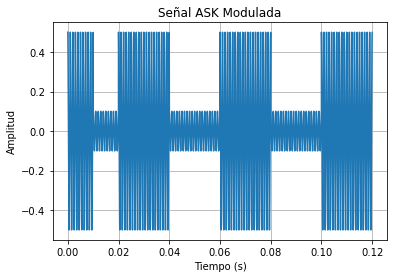

In [46]:
# Demodular la señal ASK
demodulated_bits = demodulate_ask(ask_signal, carrier_freq, sampling_rate, bit_duration, threshold)

# Convertir la lista de bits demodulados a una cadena
received_message = ''.join([str(bit) for bit in demodulated_bits])

# Imprimir el mensaje recibido
print("Mensaje recibido:", received_message)

# Graficar la señal modulada ASK
time = np.linspace(0, len(ask_signal) / sampling_rate, len(ask_signal))
plt.plot(time, ask_signal)
plt.title('Señal ASK Modulada')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.grid(True)
plt.show()
